<a href="https://colab.research.google.com/github/allemar92/Pytorch/blob/main/Image_prediction_of_Pigs_and_Boars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
!pip install -q jmd_imagescraper


In [5]:
from jmd_imagescraper.core import *

In [6]:
root = Path().cwd()/"images"

duckduckgo_search(root, "Pig", "maiale", max_results=150)
duckduckgo_search(root, "Boar", "cinghiale", max_results=150)


Duckduckgo search: maiale


Duckduckgo search: cinghiale


[Path('/content/images/Boar/001_b6a2ecc1.jpg'),
 Path('/content/images/Boar/002_47f1a93c.jpg'),
 Path('/content/images/Boar/003_55a61f15.jpg'),
 Path('/content/images/Boar/004_5b30cd00.jpg'),
 Path('/content/images/Boar/005_6abff35f.jpg'),
 Path('/content/images/Boar/006_3b792ef8.jpg'),
 Path('/content/images/Boar/007_df4b7b9d.jpg'),
 Path('/content/images/Boar/008_359f5265.jpg'),
 Path('/content/images/Boar/009_906d9228.jpg'),
 Path('/content/images/Boar/010_a9a3bc5d.jpg'),
 Path('/content/images/Boar/011_7aa734f5.jpg'),
 Path('/content/images/Boar/012_adc31f94.jpg'),
 Path('/content/images/Boar/013_48843a6f.jpg'),
 Path('/content/images/Boar/014_b6becdfb.jpg'),
 Path('/content/images/Boar/015_58e0f284.jpg'),
 Path('/content/images/Boar/016_ad4e7622.jpg'),
 Path('/content/images/Boar/017_8f375f5a.jpg'),
 Path('/content/images/Boar/018_af692998.jpg'),
 Path('/content/images/Boar/019_d92230b5.jpg'),
 Path('/content/images/Boar/020_8e81ef64.jpg'),
 Path('/content/images/Boar/021_a2b689a3

In [7]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [8]:
path = Path('images')
fns = get_image_files(path)

In [9]:
fns

(#139) [Path('images/Pig/106_d6bd5931.jpg'),Path('images/Pig/076_6a79f53c.jpg'),Path('images/Pig/014_c76bf338.jpg'),Path('images/Pig/147_91439625.jpg'),Path('images/Pig/144_6f707030.jpg'),Path('images/Pig/112_01260fe4.jpg'),Path('images/Pig/017_af00987e.jpg'),Path('images/Pig/011_b1c5709a.jpg'),Path('images/Pig/118_41054edd.jpg'),Path('images/Pig/081_d5d7992f.jpg')...]

In [10]:
failed =verify_images(fns)
failed

(#0) []

In [11]:
Pigs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)

)

In [12]:
dls = Pigs.dataloaders(path)

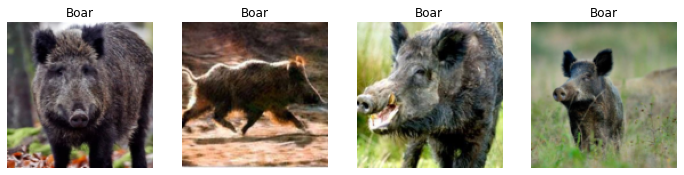

In [13]:
dls.valid.show_batch(max_n=4, nrows=1)

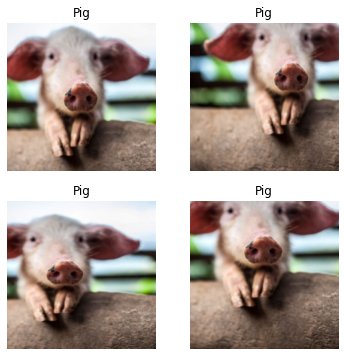

In [15]:
pigs = Pigs.new(item_tfms=RandomResizedCrop(224, min_scale=0.5))
dls=pigs.dataloaders(path)
dls.train.show_batch(max_n=4, unique=True)

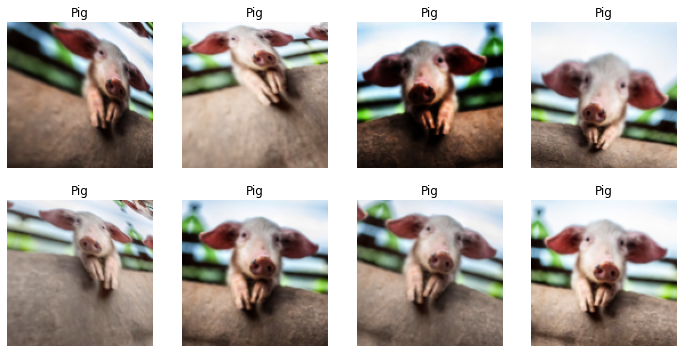

In [16]:
pigs = pigs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = pigs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [18]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(80
                )

epoch,train_loss,valid_loss,error_rate,time
0,1.203559,2.518256,0.370370,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.358764,1.786787,0.370370,00:01
1,1.182713,1.309747,0.333333,00:01
2,1.212680,1.041234,0.296296,00:01
3,1.172432,0.853163,0.333333,00:01
4,1.022537,0.692490,0.222222,00:01
5,0.983764,0.574655,0.185185,00:01
6,0.901649,0.507464,0.148148,00:01
7,0.840673,0.451146,0.148148,00:01
8,0.774197,0.404175,0.148148,00:01
9,0.728001,0.376353,0.148148,00:01


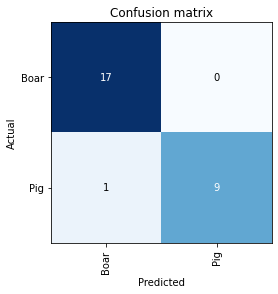

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

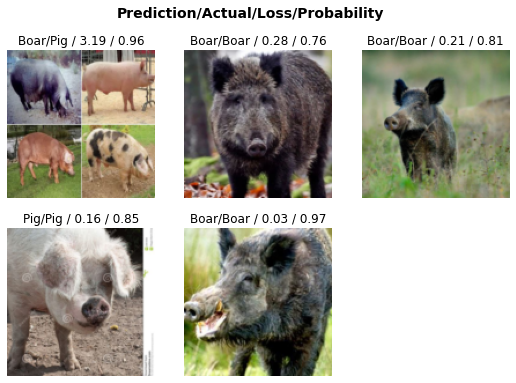

In [20]:
interp.plot_top_losses(5, nrows=2)

In [21]:
learn.export()

In [22]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [23]:
learn_inf = load_learner(path/'export.pkl')

In [25]:

btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [27]:
img = PILImage.create(btn_upload.data[-1])

In [28]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [29]:
pred, pred_idx,probs =learn_inf.predict(img)

In [30]:
lbl_pred = widgets.Label()
lbl_pred.value= f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Boar; Probability: 0.9838')

In [31]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [32]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [33]:
btn_upload = widgets.FileUpload()

In [34]:
VBox([widgets.Label('Select your Big Cat!'), 
      btn_upload, btn_run, out_pl, lbl_pred])